<a href="https://colab.research.google.com/github/binarymath/houseprice_kaggle/blob/main/House_Price(Regress%C3%A3o).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Realização do desafio da plataforma kaggle.
## Preços das casas (House Price)

## 1. Importação das bibliotecas de trabalho.

In [1]:
!pip install tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 36.9 MB/s eta 0:00:00


In [2]:
# Biblioteczas de trabalho

import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
tf.__version__

'2.13.0'

## Tratamento de dados com pandas.

In [3]:
# importando dados com pandas

dataset_train = pd.read_csv('/content/drive/MyDrive/aprofundamento/house_price/train.csv')
dataset_train.tail(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


### Dropando a coluna Id.
  #### Neste momento não utilizaremos a coluna Id.

In [4]:
# Dropando id
dataset_train = dataset_train.drop('Id', axis=1)
dataset_train.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


### Inspecionando os tipos de colunas.

In [5]:
# Inspecionando os tipos de colunas.

dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Distribuindo os preços das casas.

In [6]:
# Descrevendo o preço de venda
dataset_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Count'>

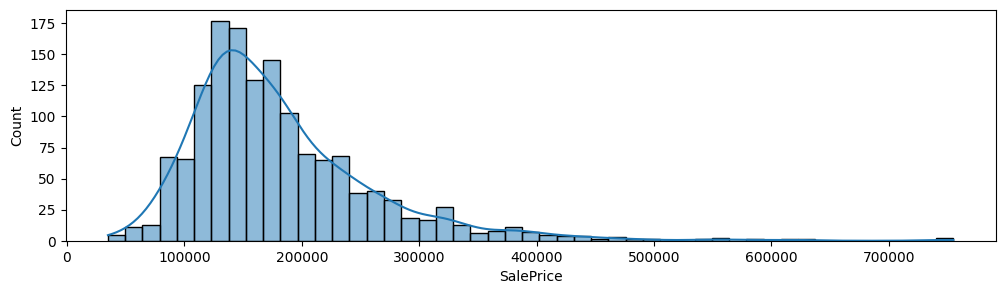

In [7]:
# Plotando a descrição
plt.figure(figsize=(12,3))
sns.histplot(dataset_train['SalePrice'], kde=True)

In [8]:
# Distribuindo os dados numéricos.

list(set(dataset_train.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

### Observando o Dataframe numérico.

In [9]:
dataset_num = dataset_train.select_dtypes(include = ['float64', 'int64'])
dataset_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


### Utilizando gráficos

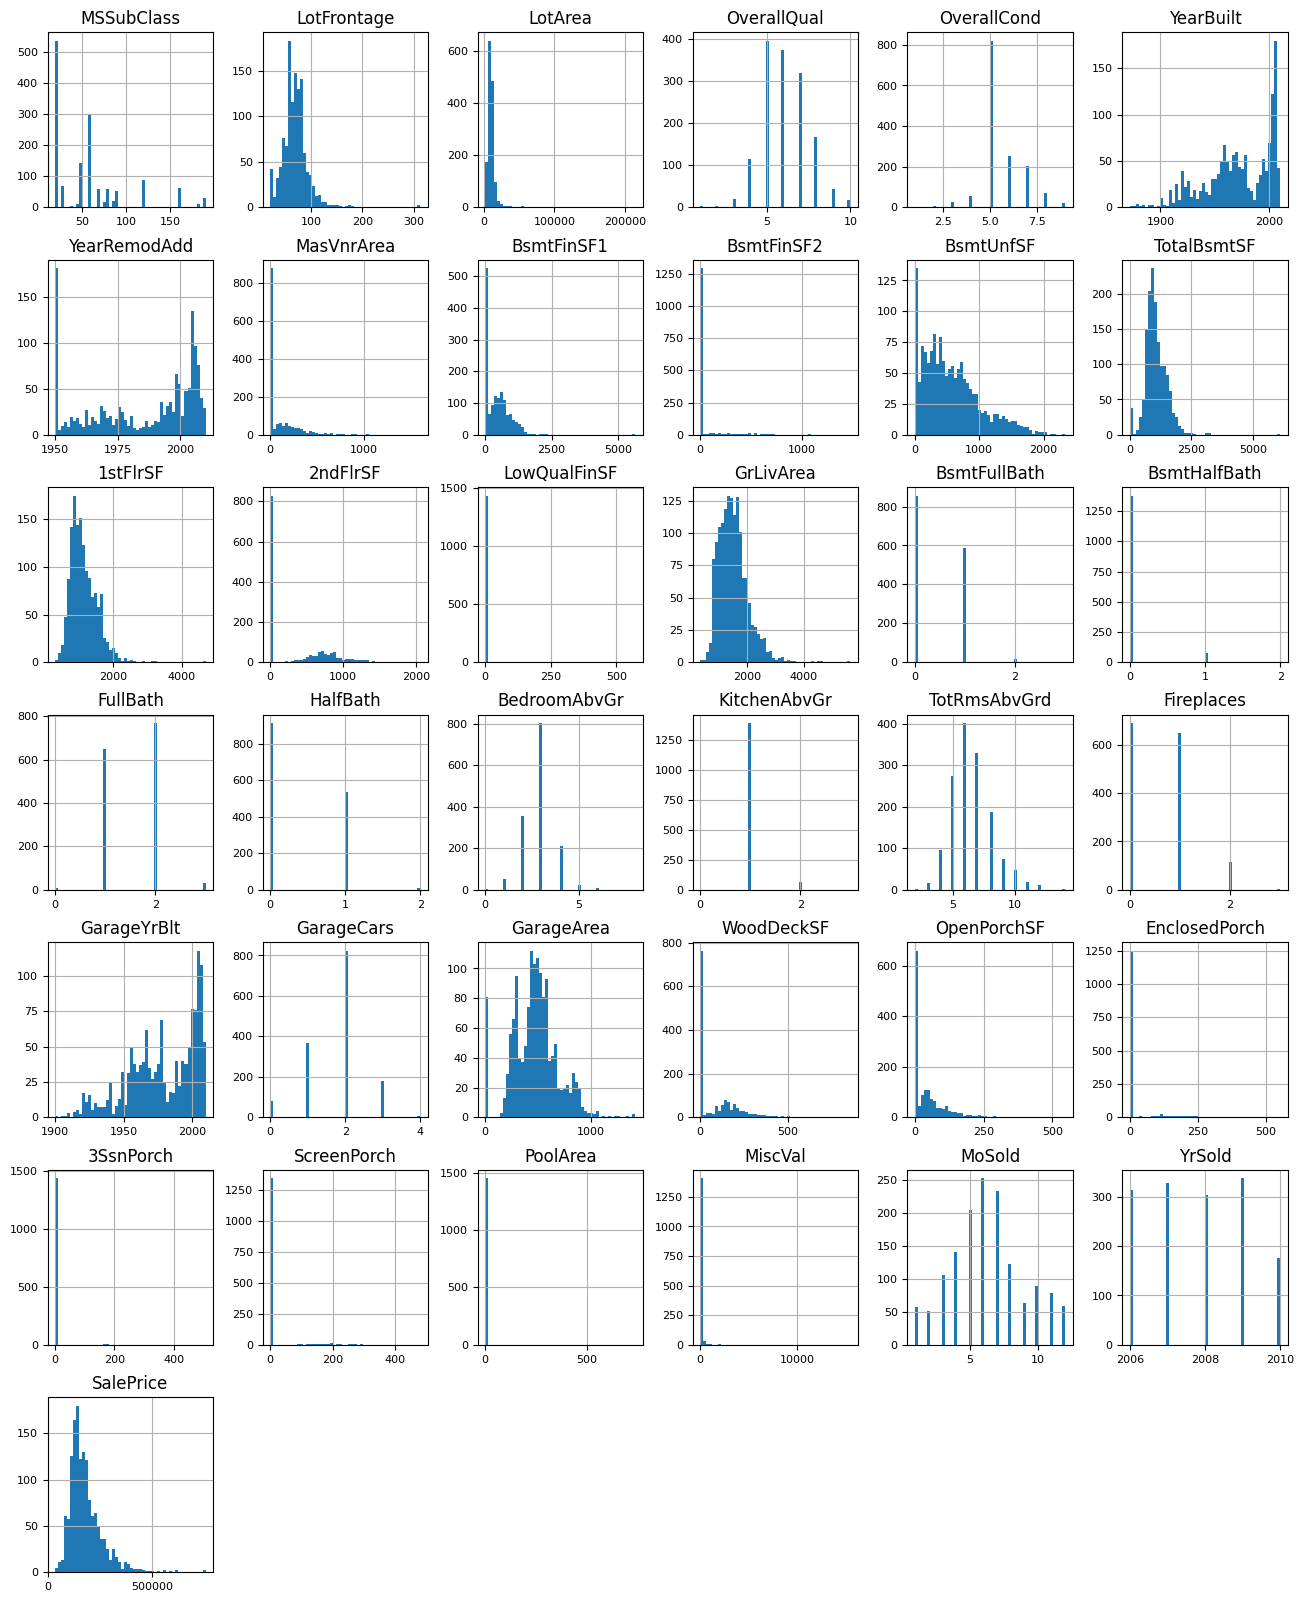

In [10]:
dataset_num.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8);

## Preparação do dataset, trabalhando TF-DF

In [18]:
def split_dataset(dataset, test_ratio=0.30):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices],dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(dataset_train)
print("{} exemplos em treinamento, {} exemplos em teste.".format(len(train_ds_pd), len(valid_ds_pd)))

1028 exemplos em treinamento, 432 exemplos em teste.


## Transformando Dataframe do pandas para o TensorFlow

In [19]:
# Transformando do Dataframe pandas para o TensorFlow

label = "SalePrice"
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)

## Árvore de decisões.


In [20]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

## RandomForestModel..

In [21]:
rf = tfdf.keras.RandomForestModel(hyperparameter_template='benchmark_rank1',task= tfdf.keras.Task.REGRESSION)

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'winner_take_all': True, 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmpryqldwd8 as temporary training directory


In [22]:
# Criando randomicamente a árvore de decisões.

rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)
rf.compile(metrics=["mse"])

Use /tmp/tmp143rofc_ as temporary training directory


## Treinando o modelo.

In [24]:
# Treinando o modelo
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:00.129542. Found 1028 examples.
Training model...
Model trained in 0:00:03.944662
Compiling model...
Model compiled.


## Visualizando modelo.

In [25]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

## *Evoluindo* os dados do modelo e do teste.

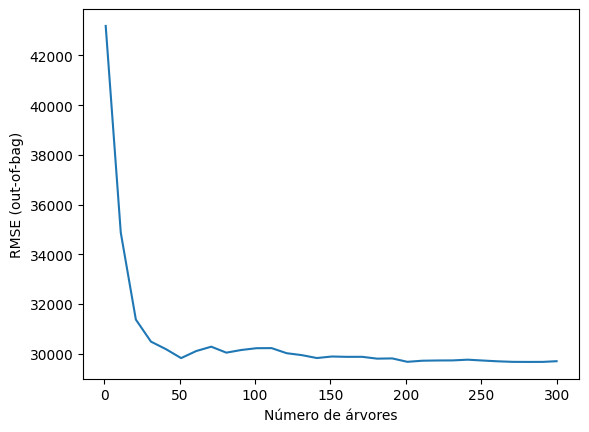

In [26]:
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs],[log.evaluation.rmse for log in logs])
plt.xlabel("Número de árvores")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [27]:
# Estatistica Gerais

inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=1028, accuracy=None, loss=None, rmse=29703.078328972242, ndcg=None, aucs=None, auuc=None, qini=None)

In [30]:
# Evoluindo com os dados

evaluation = rf.evaluate(x=valid_ds, return_dict = True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 318ms/step - loss: 0.0000e+00 - mse: 674112704.0000
loss: 0.0000
mse: 674112704.0000


## Variáveis Importantes.

In [31]:
print("Avaliando as variáveis importantes")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Avaliando as variáveis importantes
	 NUM_AS_ROOT
	 SUM_SCORE
	 NUM_NODES
	 INV_MEAN_MIN_DEPTH


In [32]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("OverallQual" (1; #62), 111.0),
 ("ExterQual" (4; #22), 53.0),
 ("Neighborhood" (4; #59), 47.0),
 ("GarageCars" (1; #32), 35.0),
 ("BsmtQual" (4; #14), 13.0),
 ("KitchenQual" (4; #44), 12.0),
 ("YearBuilt" (1; #76), 8.0),
 ("GrLivArea" (1; #38), 7.0),
 ("TotalBsmtSF" (1; #73), 7.0),
 ("GarageArea" (1; #31), 3.0),
 ("FullBath" (1; #29), 2.0),
 ("GarageYrBlt" (1; #37), 1.0),
 ("TotRmsAbvGrd" (1; #72), 1.0)]

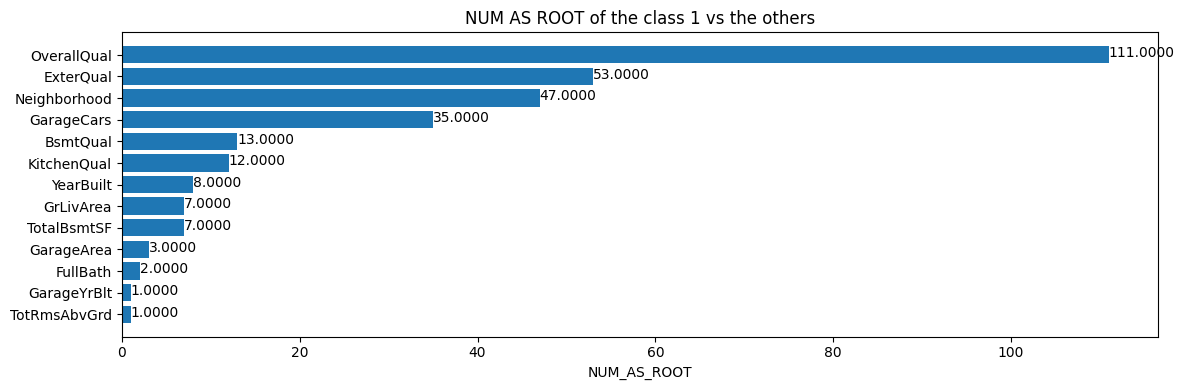

In [39]:
plt.figure(figsize=(12,4))


variable_importance_metric = "NUM_AS_ROOT"
variable_importances = inspector.variable_importances()[variable_importance_metric]





feature_names = [vi[0].name for vi in variable_importances]
feature_importances = [vi[1] for vi in variable_importances]


feature_ranks =range(len(feature_names))


bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)

plt.gca().invert_yaxis()


for importance, patch in zip(feature_importances, bar.patches):
  plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()
